In [200]:
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import pickle
from datetime import date
import re 
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
def topic_ratio(df):
    topics=['politics_and_economics','sexuality','covid','women','criminology','education','health_medicine','child_family','community_service']
    df[topics] = pd.DataFrame(df.topic_dist2.tolist(), index= df.index)
    


def add_days(df_date):
    month_dict= {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'Nov':11,'Oct':10,'Sep':9,'May':5,'Jun':6,'Jul':7,'Aug':8,'Dec':12}
    curr_month = 'Dec'
    d1 = date(2021, 12, 26)
    if('h ago' in str(df_date)):
        return 0
    elif ('d ago' in str(df_date)):
        return int(re.sub("[^0-9]", "",str(df_date)))
    
    elif (len(str(df_date))==6):
        m,d=df_date.split(' ')[0],df_date.split(' ')[1]
        m=month_dict.get(m)
        d2 = date(2021, m, int(d))
        delta = d1 - d2
        return delta.days
    
    elif (len(str(df_date))>6):
        m,d,y=df_date.split(' ')[0],df_date.split(' ')[1],df_date.split(' ')[2]
        m=month_dict.get(m)
        d=int(re.sub("[^0-9]", "",str(d)))
        d2 = date(int(y), m, int(d))
        delta = d1 - d2
        return delta.days  
    
    
    
def wor(string):
    tokens = word_tokenize(string)
    return len(tokens)



def sent_tokeniz(string):
    tokens = sent_tokenize(string)
    return len(tokens)

# Load Data 

In [136]:
df=pd.read_csv('data_topics.csv')

In [137]:
df.shape

(1185, 19)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1185 non-null   object 
 1   authers        1185 non-null   object 
 2   abstract       1185 non-null   object 
 3   type           1185 non-null   object 
 4   date_pub       808 non-null    float64
 5   journal        793 non-null    object 
 6   date_added     677 non-null    object 
 7   figuers        1185 non-null   int64  
 8   full_text      1185 non-null   object 
 9   citation       1185 non-null   int64  
 10  interest       1099 non-null   float64
 11  reads          1185 non-null   int64  
 12  or_abt         1185 non-null   object 
 13  topic_dist     1185 non-null   object 
 14  main_topic     1185 non-null   object 
 15  topic_dist_cx  1185 non-null   object 
 16  main_topic_cx  1185 non-null   object 
 17  topic_dist2    1185 non-null   object 
 18  main_top

In [139]:
df.head()

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,interest,reads,or_abt,topic_dist,main_topic,topic_dist_cx,main_topic_cx,topic_dist2,main_topic2
0,Myths about Myths? A Commentary on Thomas (202...,"['Ellen Daly', 'Olivia Smith', 'Hannah Bows[.....",commentary responds claim cheryl thomas show p...,Article,2021.0,Journal of Gender-Based Violence,6d ago,1,\nDownload,0,1.0,32,This commentary responds to claims that resear...,[1.67718582e-02 1.03844733e-02 1.96363058e-05 ...,politics,[1.00000e-06 1.00000e-06 1.00000e-06 1.00000e-...,criminology,[0.01842172 0.01106943 0. 0. 0...,politics_and_economics
1,A direct observation of pain scale use in five...,"['Laura Jenkins', 'Ruth H Parry', 'Christina F...",assessing pain intensity important palliative ...,Article,2021.0,Patient Education and Counseling,Oct 28,0,\nRequest full-text,0,0.0,9,Objective Assessing pain intensity is an impor...,[0. 0. 0. 0. 0...,community_service,[1.00000000e-06 1.00000000e-06 1.55170516e-05 ...,community_service,[0. 0. 0. 0. 0...,community_service
2,The Cold Truth: Art as Fulcrum for Recovery in...,['Eloise Malone'],describes art curating sexually exploited youn...,Article,2017.0,Journal of Social Work Practice,Oct 25,0,\nDownload,1,0.0,22,This article describes art curating with sexua...,[0.01083301 0. 0. 0. 0...,community_service,[1.00000000e-06 1.00000000e-06 1.00000000e-06 ...,community_service,[0.00831823 0. 0. 0. 0...,community_service
3,Dispositional Mindfulness Reduces Burnout and ...,"['Denisse Zúñiga', 'Manuel Torres-Sahli', 'Att...",objective many study document high prevalence ...,Article,2021.0,Mindfulness,Oct 21,1,\nDownload,0,2.0,40,Objectives Many studies document the high prev...,[0. 0. 0.05170067 0. 0...,education,[9.99999000e-01 9.99999000e-01 9.99999000e-01 ...,politics,[0. 0. 0.05381117 0. 0...,education
4,Realtalk Evidence-Based Communication Training...,"['Ruth H Parry', 'Becky Whittaker', 'Marco Pin...",background communication skill training profes...,Preprint,2021.0,NaN,Oct 14,1,\nDownload,0,2.0,43,BACKGROUND Communication skills training for p...,[0. 0. 0. 0. 0...,community_service,[1.00000e-06 1.00000e-06 9.99999e-01 9.99999e-...,education,[0. 0. 0. 0. 0...,community_service


# text stats

In [ ]:
df["topic_dist2"] = df["topic_dist2"].apply(lambda x : [float(x) for x in x.replace("[", "").replace ("]", "").split()])


In [149]:
topic_ratio(df)

In [150]:
df['t_length_w']=df["title"].apply(wor)

In [151]:
df['a_length_s']=df["or_abt"].apply(sent_tokeniz)

In [152]:
df['a_length_w']=df["abstract"].apply(wor)

In [153]:
nltk.download('vader_lexicon')
sa = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/workplace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [154]:
df['abstract_sent'] = df.apply(lambda row: sa.polarity_scores(row['abstract']), axis=1)

In [155]:
df['abstract_sent'].array[0]

{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.9413}

In [156]:
df['title_sent'] = df.apply(lambda row:  sa.polarity_scores(row['title']), axis=1)

In [157]:
pol_tags_abs=['a_neg', 'a_neu', 'a_pos', 'a_compound']
pol_tags_title=['t_neg', 't_neu', 't_pos', 't_compound']
df[pol_tags_abs] = pd.DataFrame(df.abstract_sent.tolist(), index= df.index)
df[pol_tags_title] = pd.DataFrame(df.title_sent.tolist(), index= df.index)

# Linear Regression Feauter Engineering 

### calculating number of authers 

In [158]:
df['authers_num']= df.apply(lambda row: len(row['authers'].split(',')), axis=1)

### Reformatting addtion date to days 

In [159]:
df['date_days']= df['date_added'].apply(add_days) 

## Encoding Categorical Feauters

In [160]:
df['full_text'].replace({'\nDownload':1,'\nRequest full-text':0,'\nRequest file':0,'\n access options':0}, inplace=True)

In [161]:
label_encoder=preprocessing.LabelEncoder()

In [162]:
label_encoder.fit(df['journal'])
df['journal'] = label_encoder.fit_transform(df['journal'])


In [163]:
df.head()

,title,authers,abstract,type,date_pub,journal,date_added,figuers,full_text,citation,...,a_neg,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days
0,Myths about Myths? A Commentary on Thomas (202...,"['Ellen Daly', 'Olivia Smith', 'Hannah Bows[.....",commentary responds claim cheryl thomas show p...,Article,2021.0,313,6d ago,1,1,0,...,0.291,0.709,0.000,-0.9413,0.227,0.628,0.145,-0.4019,4,6.0
1,A direct observation of pain scale use in five...,"['Laura Jenkins', 'Ruth H Parry', 'Christina F...",assessing pain intensity important palliative ...,Article,2021.0,416,Oct 28,0,0,0,...,0.231,0.581,0.188,-0.8506,0.203,0.615,0.182,-0.1779,3,59.0
2,The Cold Truth: Art as Fulcrum for Recovery in...,['Eloise Malone'],describes art curating sexually exploited youn...,Article,2017.0,351,Oct 25,0,1,1,...,0.045,0.642,0.313,0.9816,0.000,0.850,0.150,0.3182,1,62.0
3,Dispositional Mindfulness Reduces Burnout and ...,"['Denisse Zúñiga', 'Manuel Torres-Sahli', 'Att...",objective many study document high prevalence ...,Article,2021.0,382,Oct 21,1,1,0,...,0.100,0.701,0.199,0.9300,0.000,0.854,0.146,0.3400,4,66.0
4,Realtalk Evidence-Based Communication Training...,"['Ruth H Parry', 'Becky Whittaker', 'Marco Pin...",background communication skill training profes...,Preprint,2021.0,569,Oct 14,1,1,0,...,0.029,0.819,0.152,0.9648,0.000,1.000,0.000,0.0000,4,73.0


In [164]:
df.to_csv('data_topics_eng.csv', index=False)

In [202]:
df.shape

(1185, 43)

### saving the label encoder to inverse encoding if needed 

In [201]:
pickle.dump(label_encoder, open('label_enc.pkl', 'wb'))

## show the corr

<AxesSubplot:>

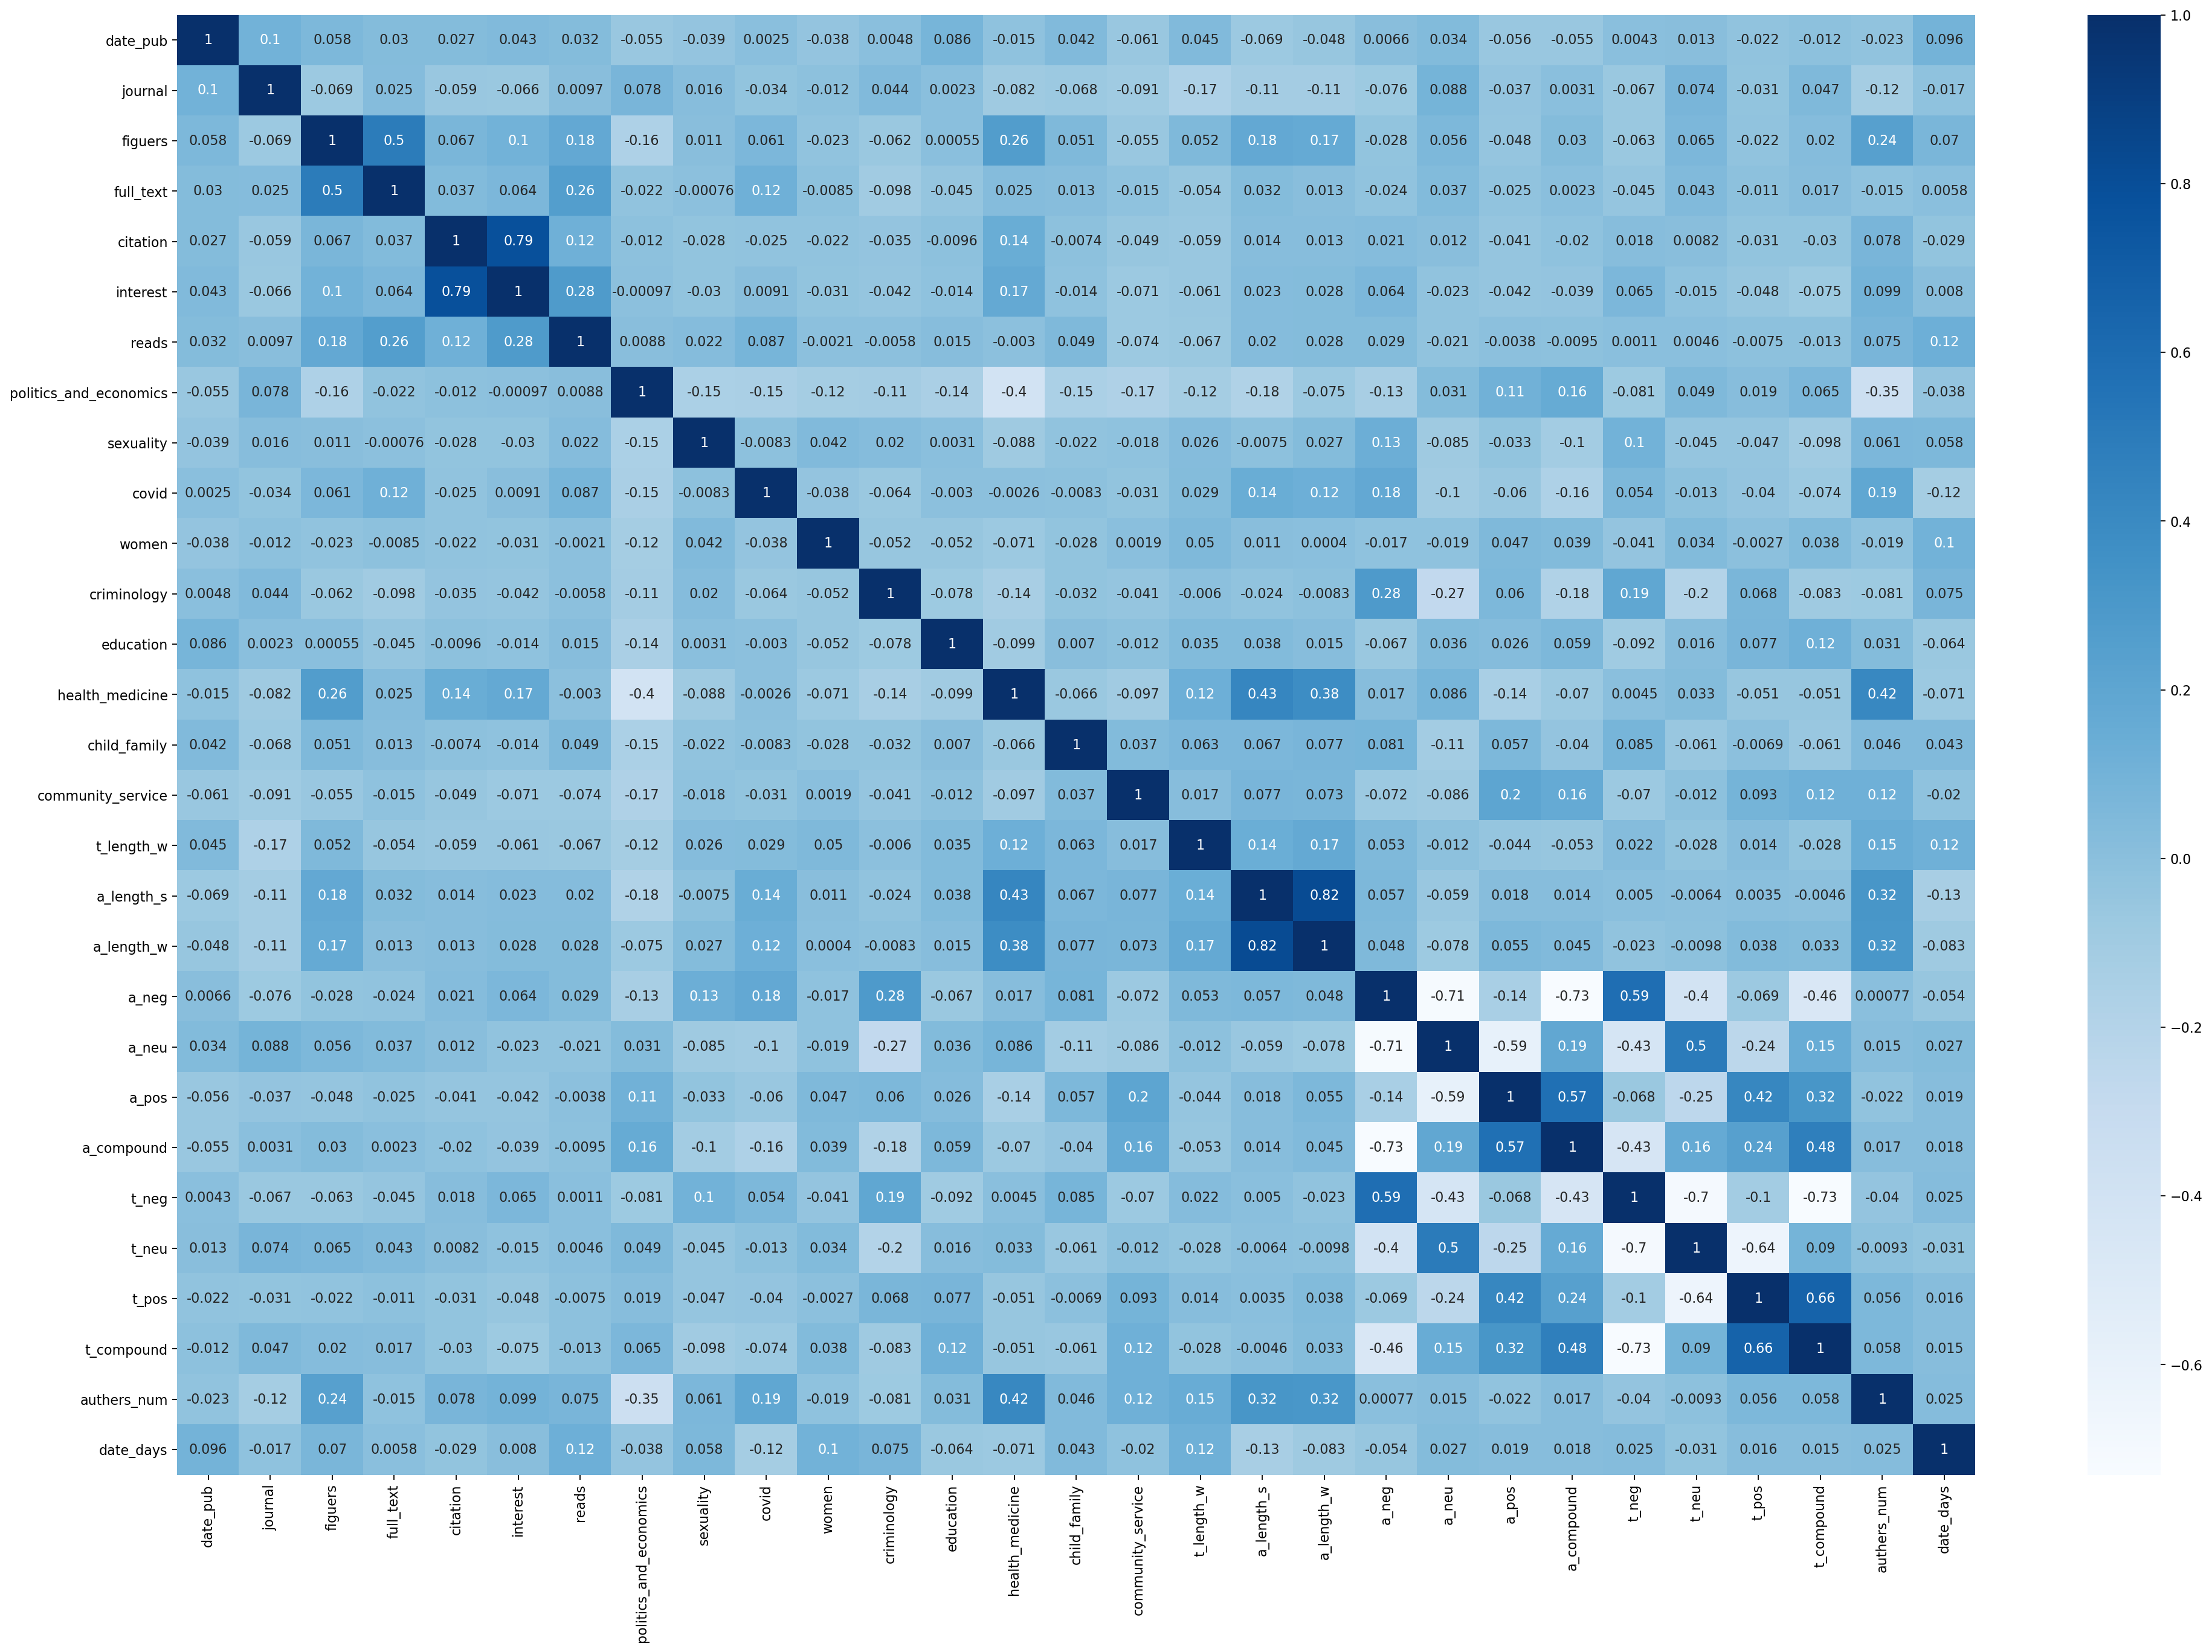

In [166]:
#to show all correlation betwan each columns
plt.figure(figsize=(30,20), dpi=160)
sns.heatmap(df.corr(),annot=True,cmap="Blues")

# Baseline Model:

In [168]:
X=df.drop(["reads","date_pub"],axis=1)
y=df["reads"]

In [169]:
or_features=['figuers','full_text','citation','interest','date_days']

In [170]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X[or_features], y, test_size=0.2,random_state=33)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.20, random_state=33)

In [171]:
"""X_train=X_train.select_dtypes(include=np.number)
X_val=X_val.select_dtypes(include=np.number)
X_test=X_test.select_dtypes(include=np.number)"""

'X_train=X_train.select_dtypes(include=np.number)\nX_val=X_val.select_dtypes(include=np.number)\nX_test=X_test.select_dtypes(include=np.number)'

In [172]:
X_train.shape

(758, 5)

In [173]:
X_trainBL=X_train.fillna(0)
X_testBL=X_test.fillna(0)
lm=LinearRegression()
lm.fit(X_trainBL,y_train)

LinearRegression()

In [174]:
lm.score(X_trainBL,y_train)

0.14525680388864548

In [175]:
X_valBL=X_val.fillna(0)
lm.score(X_valBL,y_val)

0.1429376436995512

In [176]:
lm.score(X_testBL,y_test)

0.23377989126802157

## Data prep & Experimentation:

In [177]:
def fill_na(df):
    col=df.columns
    df_filled=pd.DataFrame(columns=col)
    for c in col:
        if(df[c].dtypes == object):
            df_filled[c]= df[c].fillna(df[c].mode()[0])    
        elif (df[c].dtypes ==float or df[c].dtypes ==int):
            df_filled[c]= df[c].fillna(df[c].median())
            
    return df_filled

In [178]:
X_trainBL2=fill_na(X_train)
X_testBL2=fill_na(X_test)
X_valBL2=fill_na(X_val)


lm=LinearRegression()
lm.fit(X_trainBL2,y_train)

LinearRegression()

In [179]:
lm.score(X_trainBL2,y_train)

0.1453555778208926

In [180]:
lm.score(X_valBL2,y_val)

0.15523938082320832

In [181]:
lm.score(X_testBL2,y_test)

0.23901514984994032

## Feature Engineering 

In [184]:
X2 =df.drop(["reads",'journal','abstract',"date_pub",'title','authers','topic_dist','topic_dist_cx','abstract_sent','title_sent','main_topic','topic_dist2','date_added','or_abt','main_topic_cx'],axis=1)
y2 =df["reads"]
X2=fill_na(X2)

In [185]:
X2 

,type,figuers,full_text,citation,interest,main_topic2,politics_and_economics,sexuality,covid,women,...,a_neg,a_neu,a_pos,a_compound,t_neg,t_neu,t_pos,t_compound,authers_num,date_days
0,Article,1,1,0,1.0,politics_and_economics,0.018422,0.011069,0.000000,0.000000,...,0.291,0.709,0.000,-0.9413,0.227,0.628,0.145,-0.4019,4,6.0
1,Article,0,0,0,0.0,community_service,0.000000,0.000000,0.000000,0.000000,...,0.231,0.581,0.188,-0.8506,0.203,0.615,0.182,-0.1779,3,59.0
2,Article,0,1,1,0.0,community_service,0.008318,0.000000,0.000000,0.000000,...,0.045,0.642,0.313,0.9816,0.000,0.850,0.150,0.3182,1,62.0
3,Article,1,1,0,2.0,education,0.000000,0.000000,0.053811,0.000000,...,0.100,0.701,0.199,0.9300,0.000,0.854,0.146,0.3400,4,66.0
4,Preprint,1,1,0,2.0,community_service,0.000000,0.000000,0.000000,0.000000,...,0.029,0.819,0.152,0.9648,0.000,1.000,0.000,0.0000,4,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Article,1,1,2,4.1,politics_and_economics,0.080479,0.000000,0.000000,0.000000,...,0.088,0.692,0.221,0.9643,0.000,0.791,0.209,0.4404,2,138.0
1181,Chapter,0,0,2,1.4,health_medicine,0.011669,0.000000,0.002288,0.001974,...,0.115,0.842,0.043,-0.9016,0.000,1.000,0.000,0.0000,1,138.0
1182,Article,0,0,194,96.7,health_medicine,0.000000,0.000000,0.000000,0.020797,...,0.031,0.924,0.046,0.1027,0.000,1.000,0.000,0.0000,4,138.0
1183,Chapter,1,1,0,2.0,politics_and_economics,0.052179,0.012575,0.000000,0.000000,...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,2,138.0


In [186]:
dummy_X=pd.get_dummies(X2,drop_first=True)

In [187]:
dummy_X.head()

,figuers,full_text,citation,interest,politics_and_economics,sexuality,covid,women,criminology,education,...,type_Technical Report,type_Thesis,main_topic2_community_service,main_topic2_covid,main_topic2_criminology,main_topic2_education,main_topic2_health_medicine,main_topic2_politics_and_economics,main_topic2_sexuality,main_topic2_women
0,1,1,0,1.0,0.018422,0.011069,0.000000,0.0,0.008648,0.000000,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,0.0,0.008318,0.000000,0.000000,0.0,0.002732,0.000000,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,2.0,0.000000,0.000000,0.053811,0.0,0.001198,0.166667,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0,2.0,0.000000,0.000000,0.000000,0.0,0.022442,0.037321,...,0,0,1,0,0,0,0,0,0,0


In [188]:
X_train_val2, X_test2, y_train_val2, y_test2 = train_test_split(dummy_X, y2, test_size=0.2,random_state=23)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train_val2, y_train_val2, test_size=.25, random_state=23)

In [189]:
y_test2_log=np.log(y_test2)
y_train2_log=np.log(y_train2)
y_val2_log=np.log(y_val2)

/Users/workplace/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [190]:
y_train2.isna().sum()

0

In [191]:
model4 = LinearRegression()
model4.fit(X_train2, y_train2)

LinearRegression()

In [192]:
model4.score(X_train2,y_train2)

0.2332268611101419

In [193]:
model4.score(X_val2,y_val2)

0.2029284385299558

In [194]:
model4.score(X_test2,y_test2)

0.04450534258982963

## Lasso & Ridge Regression 

In [195]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import cross_val_score

In [196]:
ss= StandardScaler()

ss_X_train2=ss.fit_transform(X_train2)
ss_X_test2=ss.transform(X_test2)

In [197]:
rr100 = Ridge(alpha=250) #  comparison with alpha value
rr100.fit(X_train2, y_train2)
print(f'training score : {rr100.score(X_train2,y_train2)}')
print(f'test score : {rr100.score(X_val2,y_val2)}')
print(f'test score : {rr100.score(X_test2,y_test2)}')

training score : 0.13376143453126976
test score : 0.17280538239359333
test score : 0.12148207724750748


In [198]:
ll = Lasso(alpha=0.9) #  comparison with alpha value
ll.fit(X_train2, y_train2)
print(f'training score : {ll.score(X_train2,y_train2)}')
print(f'test score : {ll.score(X_val2,y_val2)}')
print(f'test score : {ll.score(X_test2,y_test2)}')

training score : 0.16732380281398684
test score : 0.19744312858244717
test score : 0.12781478811628444
